In [1]:
from setproctitle import setproctitle
setproctitle("SPINN")

In [2]:
import os
from glob import glob

hmi_path = '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/'

hmi_p_files = sorted(glob(os.path.join(hmi_path, '*Bp.fits'))) 
hmi_t_files = sorted(glob(os.path.join(hmi_path, '*Bt.fits')))  
hmi_r_files = sorted(glob(os.path.join(hmi_path, '*Br.fits')))  

hmi_files = list(zip(hmi_p_files, hmi_t_files, hmi_r_files))

In [3]:
hmi_files[247]

('/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits',
 '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits',
 '/mnt/obsdata/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits')

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]
See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


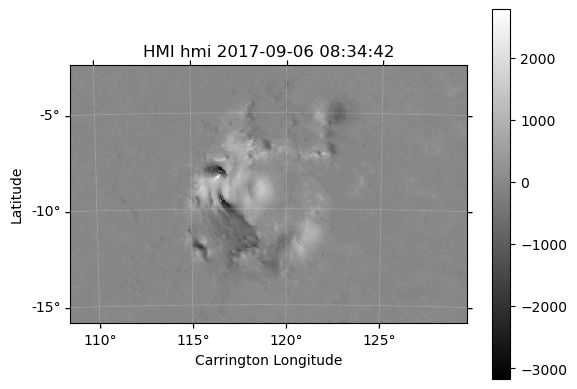

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


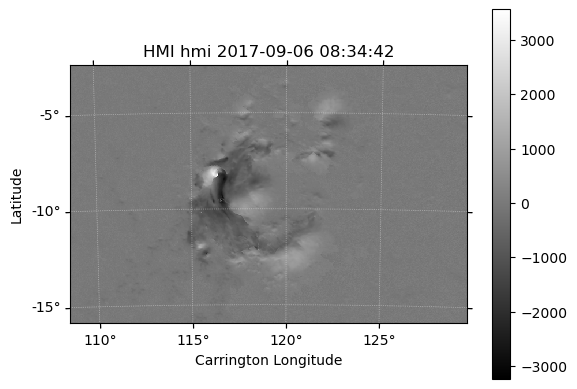

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


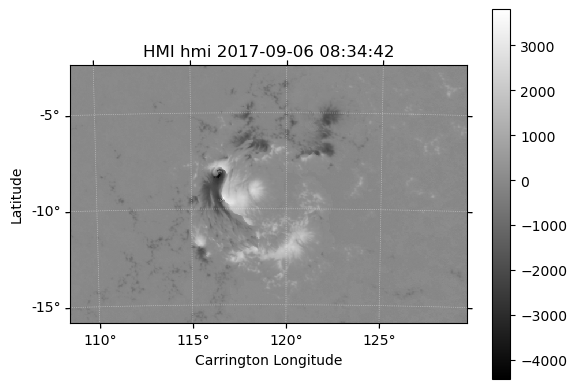

In [4]:
from sunpy.map import Map

hmi_p, hmi_t, hmi_r = hmi_files[247]

p_map = Map(hmi_p)
t_map = Map(hmi_t)
r_map = Map(hmi_r)

p_map.peek()
t_map.peek()
r_map.peek()

In [5]:
p_map.meta

MetaDict([('simple', True),
          ('bitpix', 32),
          ('naxis', 2),
          ('naxis1', 688),
          ('naxis2', 448),
          ('blank', -2147483648),
          ('bzero', 0.0),
          ('bscale', 0.01),
          ('checksum', 'FE8hGB6eFB6eFB6e'),
          ('datasum', '1256039024'),
          ('date', '2017-10-12T03:04:30.000'),
          ('date_s', '2017-09-10T16:43:45.000'),
          ('date_b', '2017-09-11T16:54:13.000'),
          ('date-obs', '2017-09-06T08:34:42.100'),
          ('t_obs', '2017.09.06_08:36:04.065_TAI'),
          ('t_rec', '2017.09.06_08:36:00.000_TAI'),
          ('trecepoc', '1993.01.01_00:00:00.000_TAI'),
          ('trecstep', 720.0),
          ('trecunit', 'secs'),
          ('cadence', 720.0),
          ('usflux', 4.54206983e+22),
          ('meangam', 52.2278175),
          ('meangbt', 106.246407),
          ('meangbz', 124.862877),
          ('meangbh', 72.5381699),
          ('meanjzd', -0.178253114),
          ('totusjz', 85942731800000

In [11]:
import matplotlib.pyplot as plt

def draw(B_hmi):
    fig, ax = plt.subplots(figsize=(6,6))
    CS = plt.imshow(B_hmi[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"shape: {B_hmi.shape}")
    fig.colorbar(CS, label=r"$B_z$(z=0)")
    plt.show()

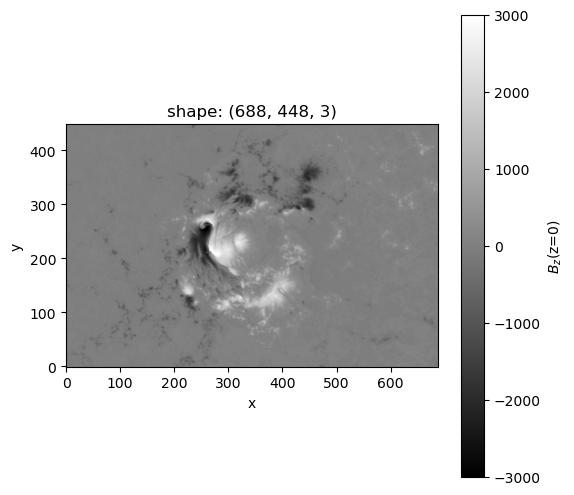

In [14]:
import numpy as np 

maps = [p_map, t_map, r_map]
B_hmi = np.stack([maps[0].data, -maps[1].data, maps[2].data]).transpose()

draw(B_hmi)

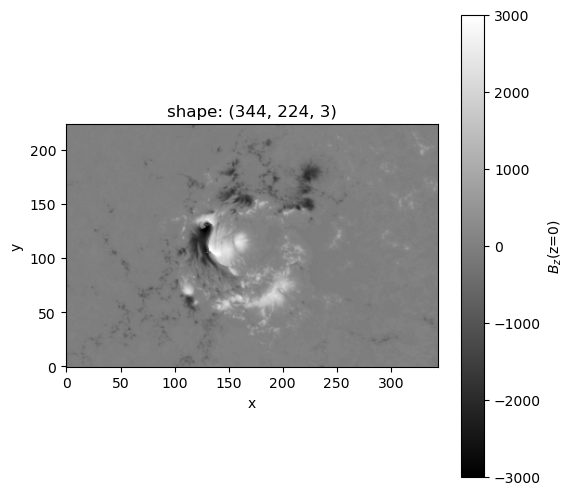

In [16]:
from astropy import units as u

stride = 2
maps_binned = [m.superpixel(u.Quantity((stride, stride), u.pixel), func=np.mean) for m in maps]

RE_B_hmi = np.stack([maps_binned[0].data, -maps_binned[1].data, maps_binned[2].data]).transpose()

draw(RE_B_hmi)

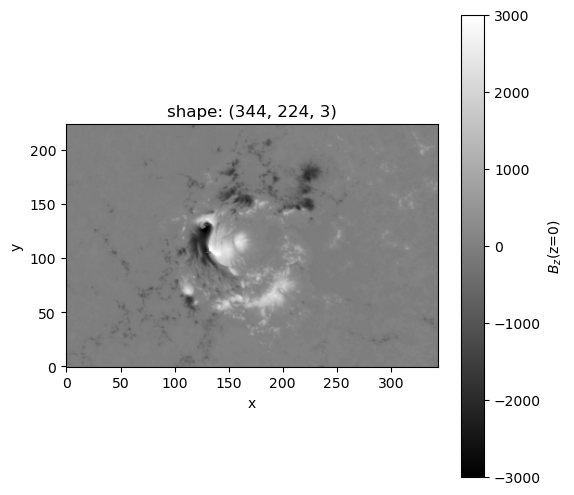

In [20]:
from skimage.transform import resize
from copy import deepcopy

Re_B_hmi = deepcopy(resize(B_hmi, (B_hmi.shape[0] // 2, B_hmi.shape[1] // 2, 3), preserve_range=True, anti_aliasing=True))

draw(Re_B_hmi)

In [22]:
base_path = os.path.expanduser('~/workspace_learn/_data/')
b_bottom_path = os.path.join(base_path, f'b_bottom.npy')

os.makedirs(base_path, exist_ok=True)
np.save(b_bottom_path, RE_B_hmi)

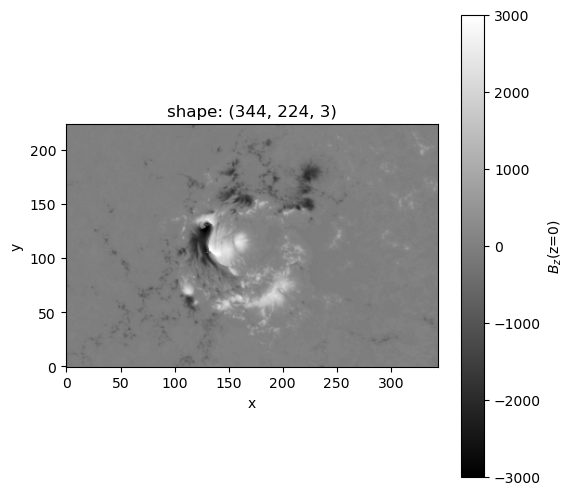

In [23]:
B_load = np.load(b_bottom_path)

draw(B_load)